# Problem Statement:
## Forecast the CocaCola prices and Airlines Passengers data set. 
Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [252]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
# import the dataset
df=pd.read_excel("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 18- FORECASTING/Airlines+Data.xlsx")
print('shape of data:',df.shape)
df.head()

shape of data: (96, 2)


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# EDA

In [254]:
#checking for null values
# for time series analysis there should not be any missing values.
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

<AxesSubplot:>

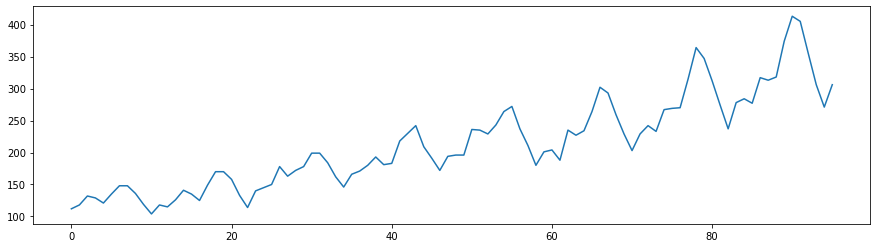

In [255]:
# plot the graph showing the passenger with respect to to time
df.Passengers.plot(figsize=(15,4))


# Descriptive Analysis

In [256]:
#checking the datatype
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [257]:
#checking the unique values for each feature
df.nunique()

Month         96
Passengers    80
dtype: int64

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [259]:
#checking for duplicated data
df[df.duplicated()]

,Month,Passengers


In [260]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Feature Engineering

In [261]:
# changing the name of column from month to date
df.rename(columns={'Month':'Date'},inplace=True)
df

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [262]:
# making the date as date time index
df1=df.copy()
df1.set_index('Date',inplace=True)
df1

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


#### Seperating the month and year from dataset into seperate column for removing the insite from data

In [263]:
df['Date']=pd.to_datetime(df.Date,format='%b-%y')
df['Month']=df.Date.dt.strftime('%b')   # month extraction
df['Year']=df.Date.dt.strftime('%Y')    # year extraction
df

,Date,Passengers,Month,Year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


# Data Visualization

<AxesSubplot:xlabel='Month', ylabel='Year'>

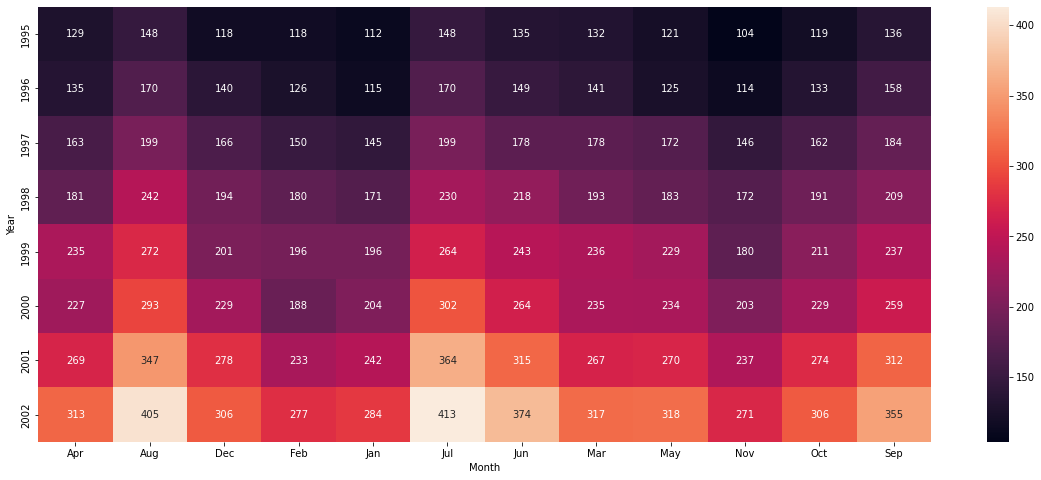

In [264]:
plt.figure(figsize=(20,8))
heatmap_year=pd.pivot_table(data=df,values='Passengers',index='Year',columns='Month',aggfunc='mean')
sns.heatmap(heatmap_year,annot=True,fmt='g')   # fmt is for grid values

<function matplotlib.pyplot.show(close=None, block=None)>

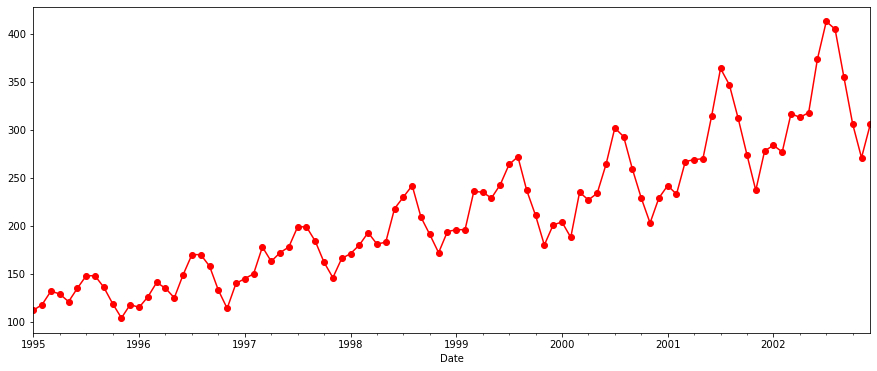

In [265]:
df1['Passengers'].plot(figsize=(15,6),color='red',marker='o')
plt.show

# Observation:
1. Trend is increasing. but trend is not constant
2. Varience is not constant

Hence time series is not constant

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

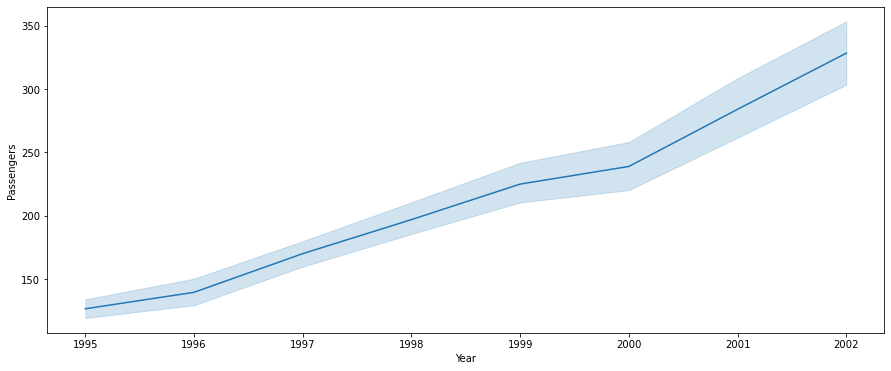

In [266]:
# line plot year Vs Passenger
plt.figure(figsize=(15,6))
sns.lineplot(x='Year',y='Passengers',data=df)

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

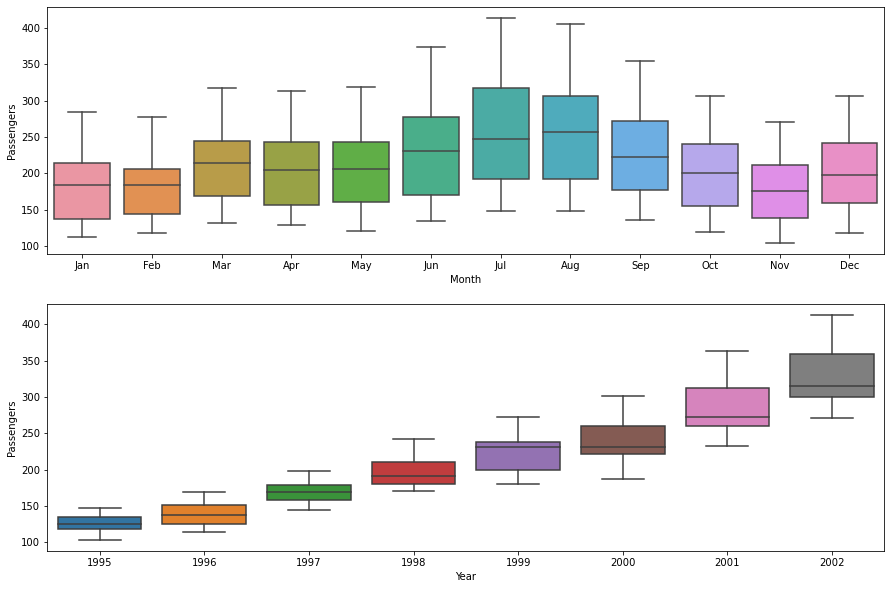

In [267]:
#Boxplot for year and month
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x='Month',y='Passengers',data=df)
plt.subplot(212)
sns.boxplot(x='Year',y='Passengers',data=df)

# Lag-Plot
A lag plot is a special type of scatter plot in which the X-axis represents the dataset with some time units behind or ahead as compared to the Y-axis. The difference between these time units is called lag or lagged and it is represented by k.  

### The lag plot contains the following axes:

Vertical axis: Yi for all i  
Horizontal axis: Yi-k for all i, where k is lag value  
The lag plot is used to answer the following questions:  

#### Distribution of Model: 
Distribution of model here means deciding what is the shape of data on the basis of the lag plot. Below are some examples of lag plot and their original plot:

1. If the lag plot is linear, then the underlying structure is of the autoregressive model.
2. If the lag plot is of elliptical shape, then the underlying structure represents a continuous periodic function such as sine, cosine, etc.

#### Outliers: 
Outliers are a set of data points that represent the extreme values in the distribution

#### Randomness in data:
The lag plot is also useful for checking whether the given dataset is random or not. If there is randomness in the data then it will be reflected in the lag plot, if there is no pattern in the lag plot.

#### Seasonality: 
If there is seasonality in the plot then, it will give a periodic lag plot.

#### Autocorrelation: 
1. If the lag plot gives a linear plot, then it means the autocorrelation is present in the data, whether there is positive autocorrelation or negative that depends upon the slope of the line of the dataset.
2. If more data is concentrated on the diagonal in lag plot, it means there is a strong autocorrelation.


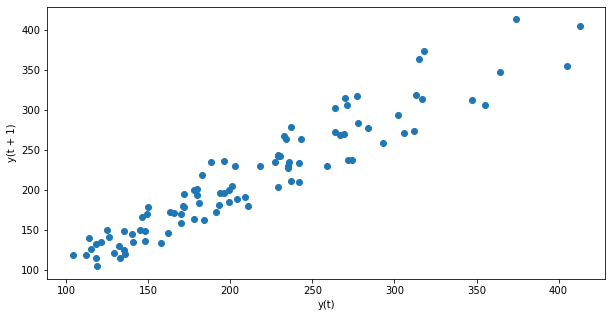

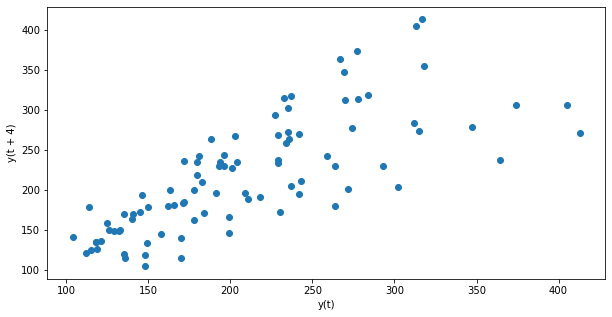

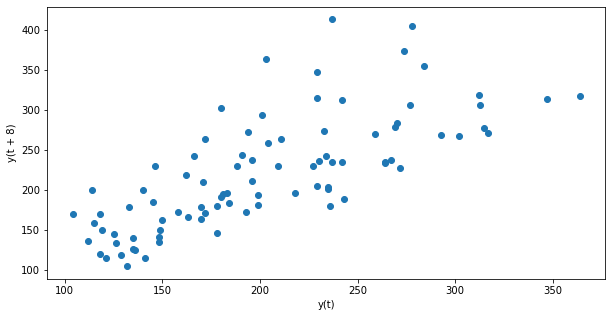

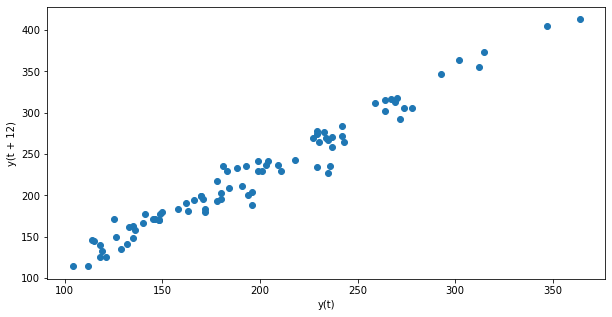

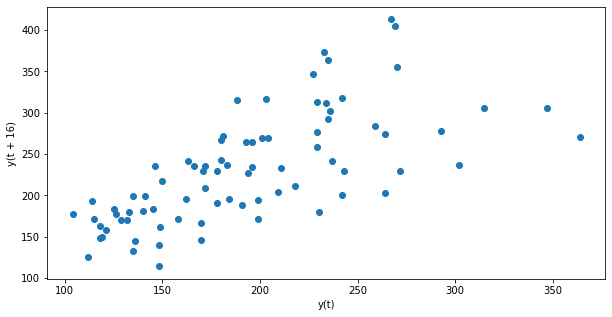

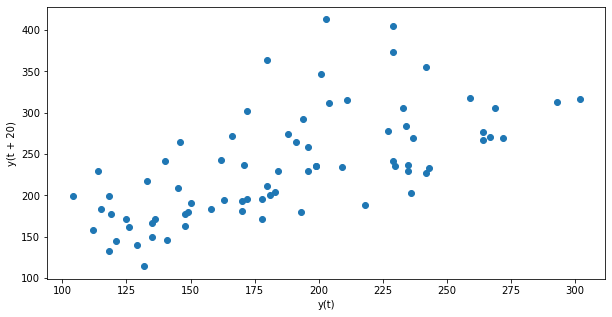

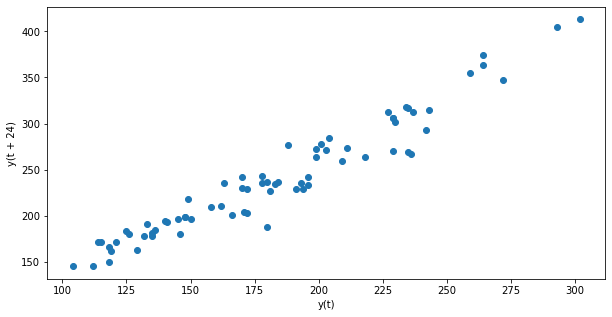

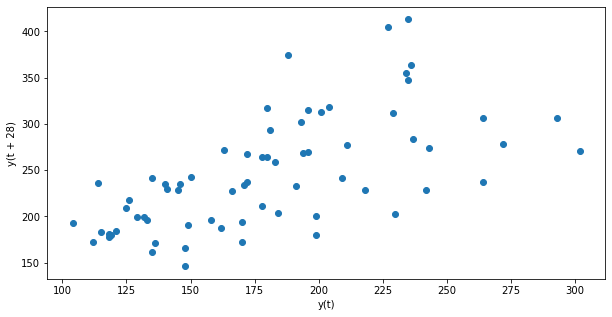

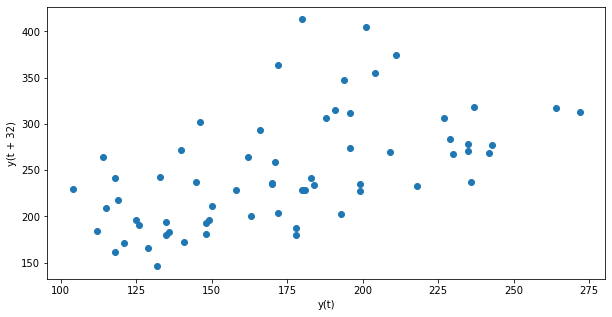

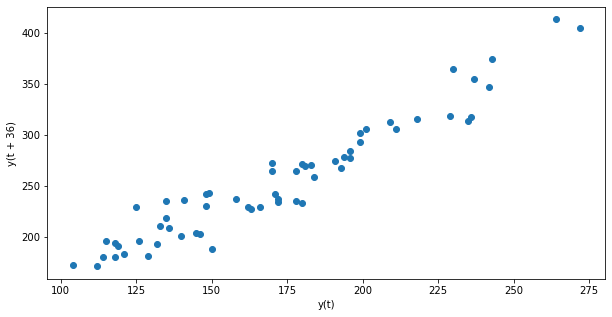

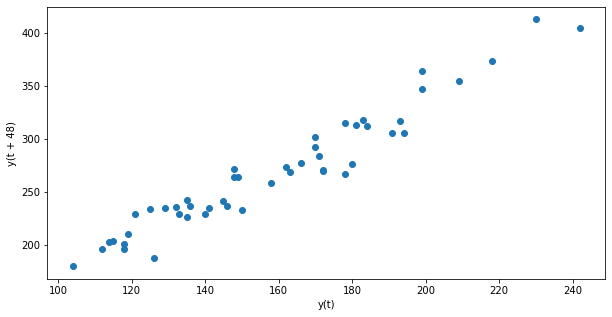

In [268]:
# plot lag plot
from pandas.plotting import lag_plot
for i in (1,4,8,12,16,20,24,28,32,36,48):
    plt.figure(figsize=(10,5))
    lag_plot(df.Passengers, lag=i)
    plt.show()

# Moving Average
1. Moving average refers to a series of averages of fixed size subsets of the total set of observations. It is also known as rolling average, running average, rolling means or running average.

2. Consider the set of n observations and k be the size of the window for determining the average at any time t. Then moving average list is calculated by initially taking the average of the first k observations present in the current window and storing it in the list. Now, the window is expanded according to the condition of the moving average to be determined and again average of the elements present in the window is calculated and stored in the list. This process is continued until the window has reached the end of the set. 

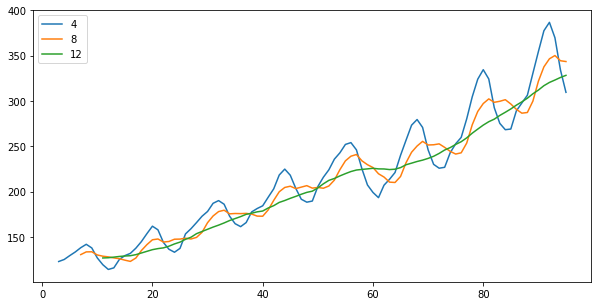

In [269]:
plt.figure(figsize=(10,5))
for i in range(4,13,4):     # range 4 to 13 with interval of 4
    df['Passengers'].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')

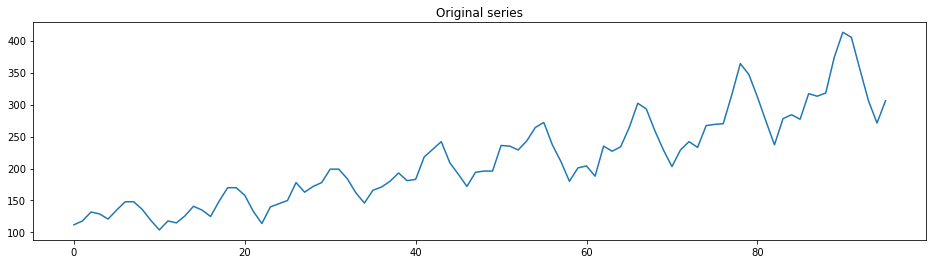

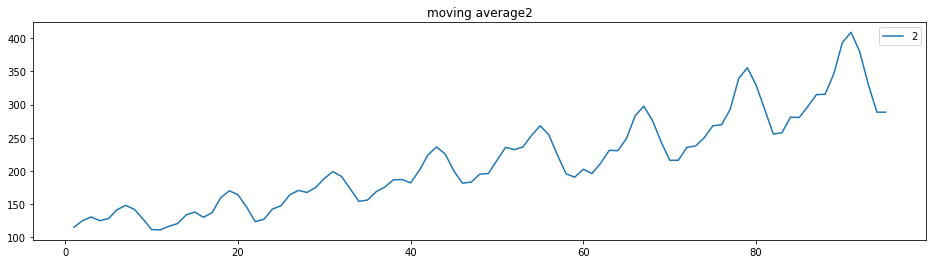

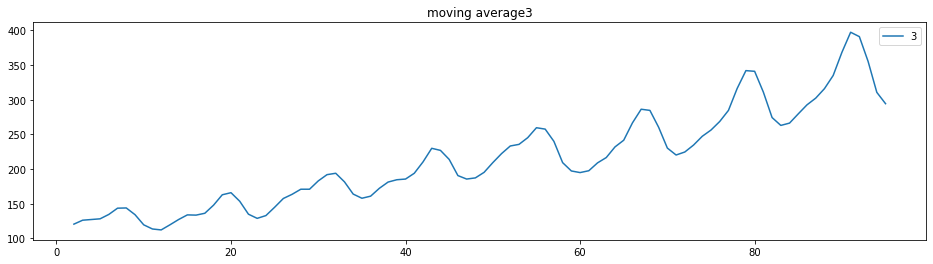

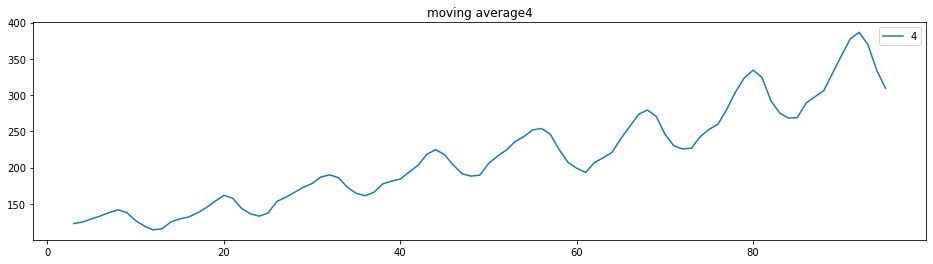

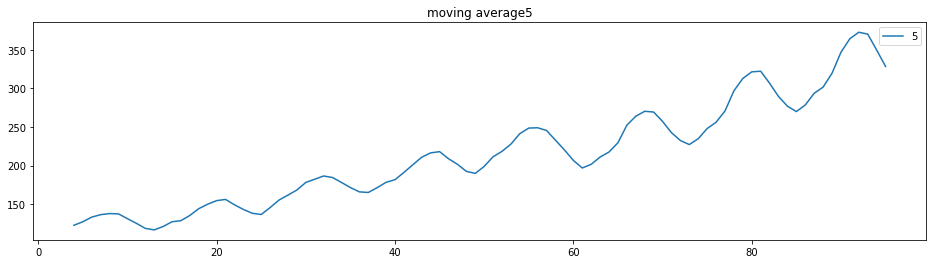

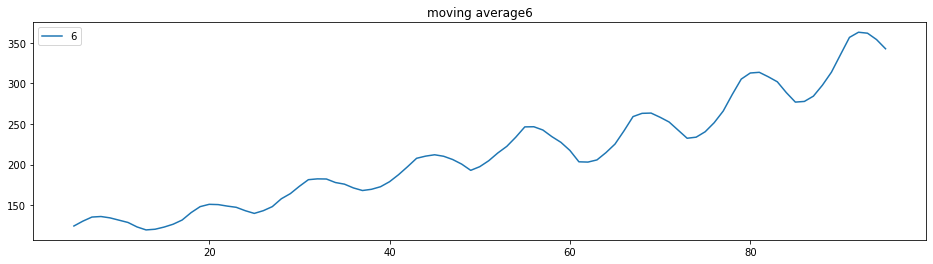

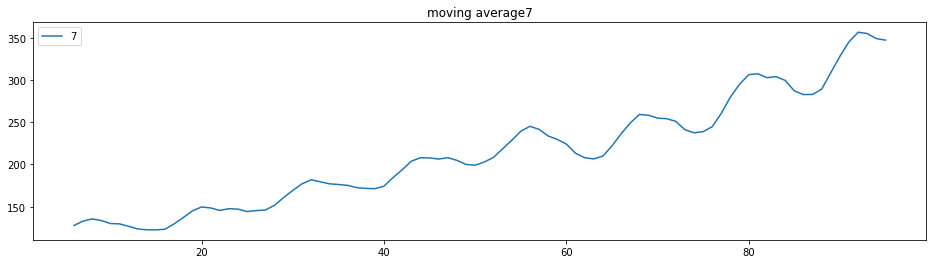

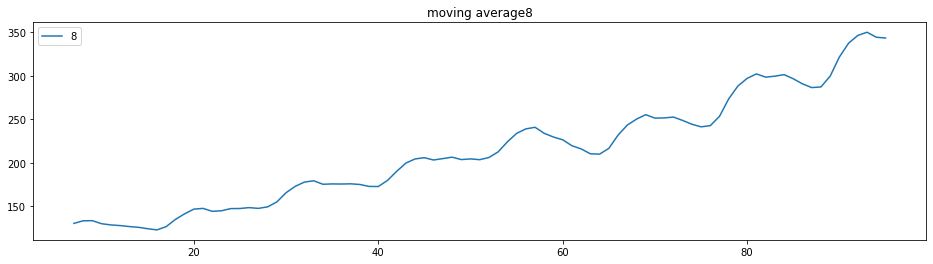

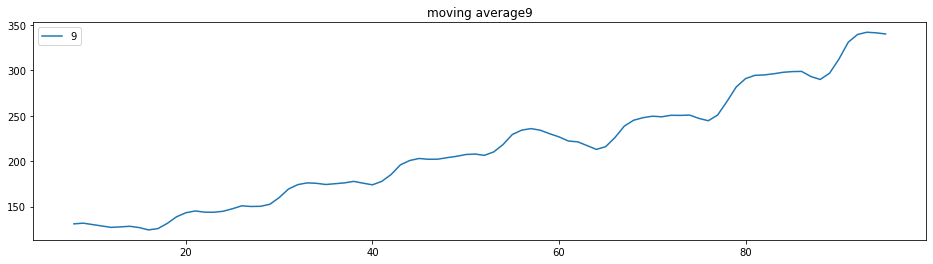

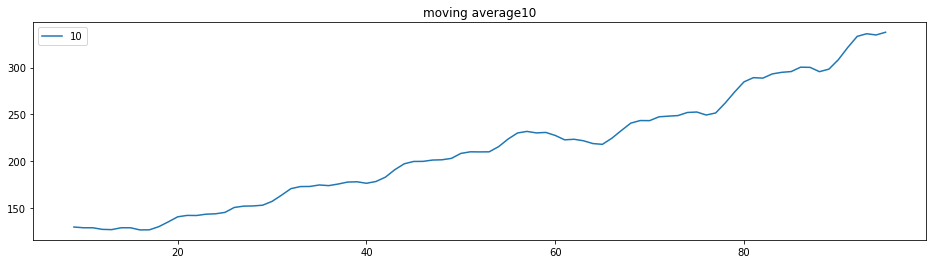

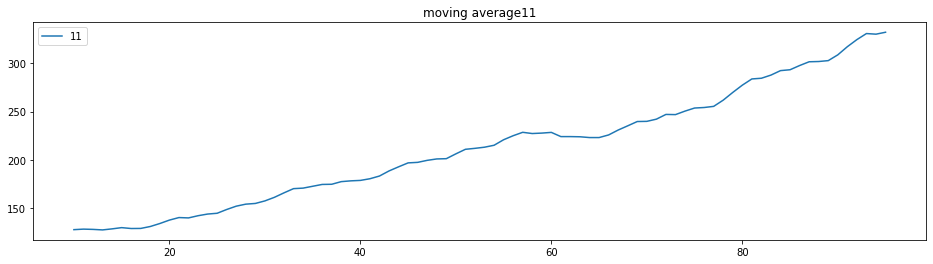

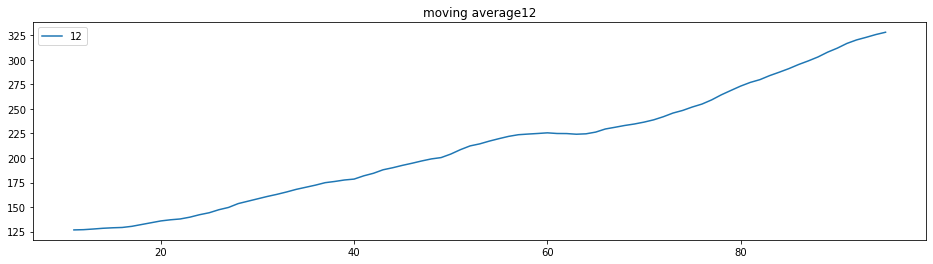

In [270]:
plt.figure(figsize=(16,4))
df.Passengers.plot(label='org')
plt.title('Original series')

for i in range(2,13):     # range 4 to 13 with interval of 4
     plt.figure(figsize=(16,4))
     df['Passengers'].rolling(i).mean().plot(label=str(i))
     plt.legend(loc='best')
     plt.title('moving average'+str(i))

We acn see here at moving average 12 trend is almost constant

Text(0.5, 1.0, 'moving average12')

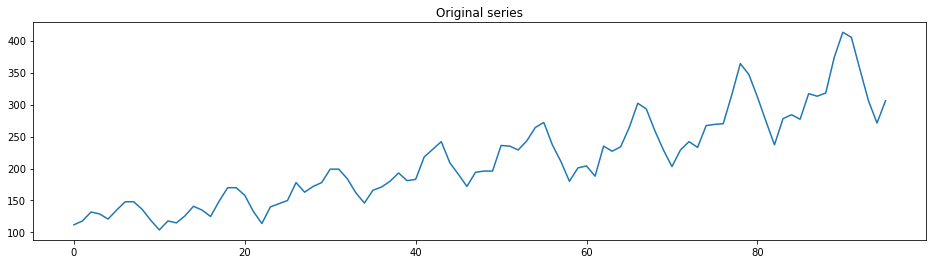

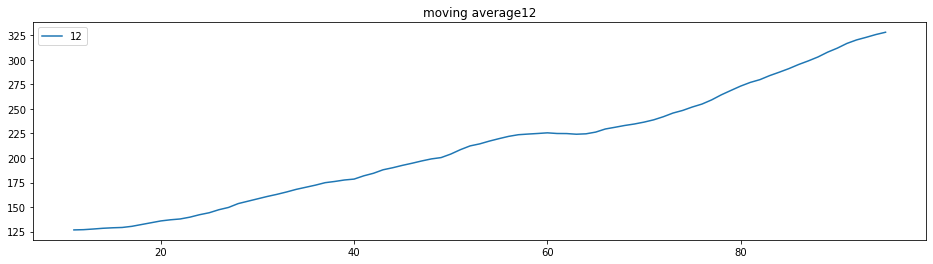

In [271]:
plt.figure(figsize=(16,4))
df.Passengers.plot(label='org')
plt.title('Original series')
plt.figure(figsize=(16,4))
df['Passengers'].rolling(12).mean().plot(label='12')
plt.legend(loc='best')
plt.title('moving average'+str(12))

# Time Serie Decomposition Plot

A time series can be thought of as being made up of 4 components:

1. A seasonal component
2. A trend component
3. A cyclical component, and
4. A noise component.

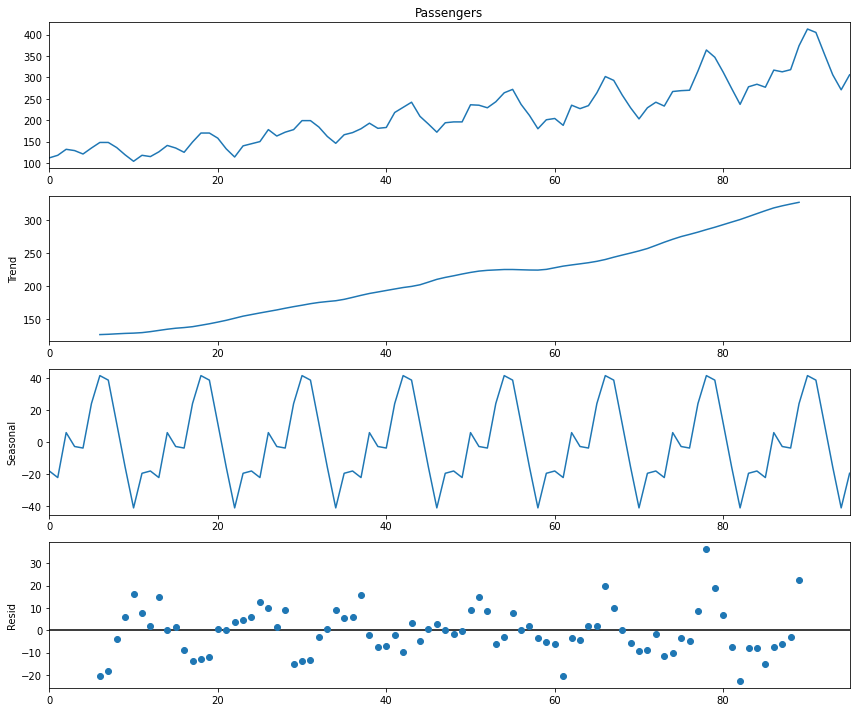

In [272]:
from statsmodels.tsa.seasonal import seasonal_decompose
#Decompose_ts=seasonal_decompose(df.Passengers,period=12)
with plt.rc_context():
    plt.rc('figure',figsize=(12,10))
    seasonal_decompose(df.Passengers,period=12).plot()


# ACF and PACF plot

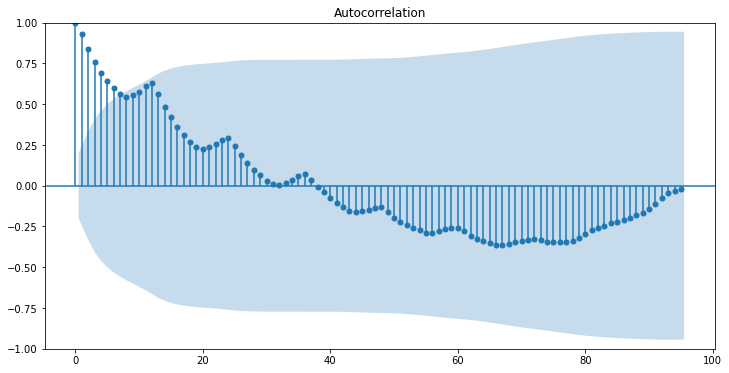

In [273]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
     plt.rc('figure',figsize=(12,6))
     tsa_plots.plot_acf(df.Passengers,lags=95)
     plt.show()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


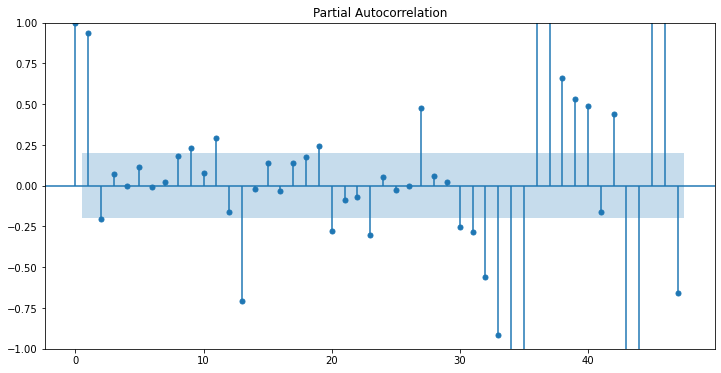

In [274]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
     plt.rc('figure',figsize=(12,6))
     tsa_plots.plot_pacf(df.Passengers,lags=47)
     plt.show()

# Additive Seasonal Decomposition

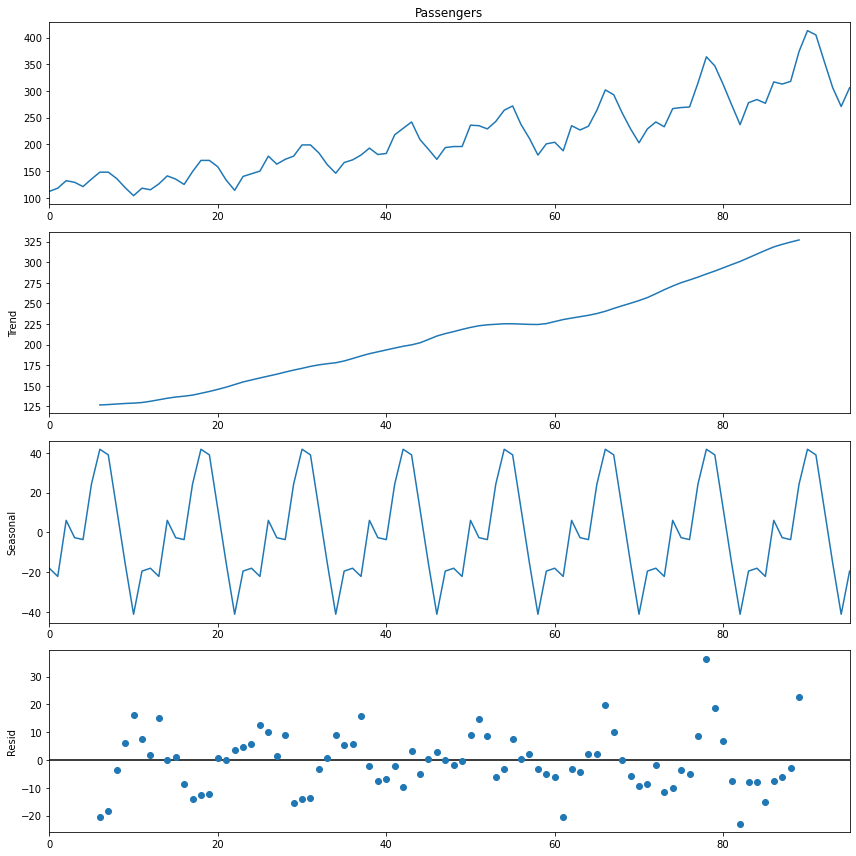

In [275]:
with plt.rc_context():
     plt.rc('figure',figsize=(12,12))
     seasonal_decompose(df.Passengers,period=12,model='additive').plot()
     plt.show()
    

# Spliting the train and test data

In [276]:
size=72
train_data=df1[:size]
test_data=df1[size:]

In [277]:
print('train:',train_data.index.min(),train_data.index.max(),'\n',
     'test:',test_data.index.min(),test_data.index.max())

train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 test: 2001-01-01 00:00:00 2002-12-01 00:00:00


#### we are going to test data on last two year i.e 2001 and 2002

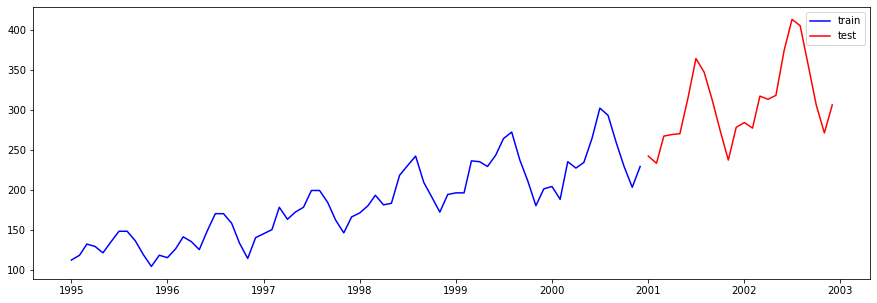

In [278]:
plt.figure(figsize=(15,5))
plt.plot(train_data,label='train',color='blue')
plt.plot(test_data,label='test',color='red')
plt.legend(loc='best')
plt.show()


# Evaluation matrix MAPE

Absolute Percentage Error (or simply MAPE) also known as Mean Absolute Percentage Deviation (MAPD) in python. The MAPE term determines how better accuracy does our forecast gives. The ‘M’ in MAPE stands for mean which takes in the average value over a series, ‘A’ stands for absolute that uses absolute values to keep the positive and negative errors from canceling one another out, ‘P’ is the percentage that makes this accuracy metric a relative metric, and the ‘E’ stands for error since this metric helps to determine the amount of error our forecast has. 

In [279]:
def MAPE(actual,predicted):
    error=np.abs((predicted-actual)/actual)*100
    return np.mean(error)

# Exponential Method

## 1. Simple Exponential Method

In [280]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from math import sqrt
from sklearn.metrics import mean_squared_error

se_model=SimpleExpSmoothing(train_data['Passengers']).fit(optimized=True)
test_pred_se=se_model.forecast(24)
train_pred_se=se_model.fittedvalues
test_rsme_se=sqrt(mean_squared_error(test_pred_se,test_data.Passengers))
train_rsme_se=sqrt(mean_squared_error(train_pred_se,train_data.Passengers))
mape_se=MAPE(test_data.Passengers,test_pred_se)
print('Simple Exponential method Evaluation','\n',
     'mean absoluet percentage error={}'.format(mape_se),'\n',\
    'train root mean squared error={}'.format(train_rsme_se),'\n',
     'test root mean squared error={}'.format(test_rsme_se))

Simple Exponential method Evaluation 
 mean absoluet percentage error=23.382283350044727 
 train root mean squared error=19.031771730910982 
 test root mean squared error=91.11325402904403


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


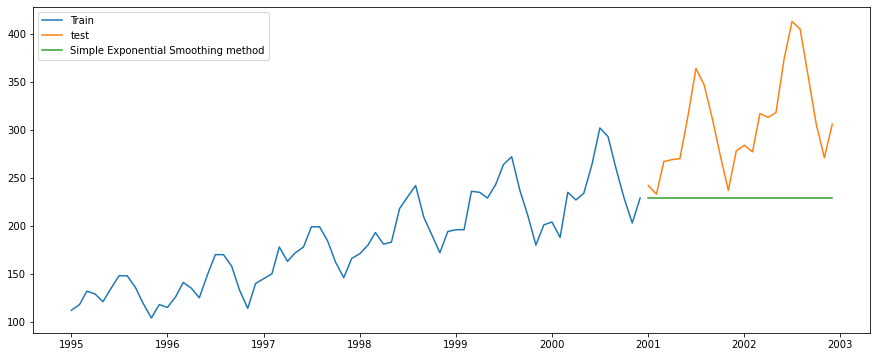

In [281]:
plt.figure(figsize=(15,6))
plt.plot(train_data,label='Train')
plt.plot(test_data,label='test')
plt.plot(test_pred_se,label='Simple Exponential Smoothing method')
plt.legend(loc='best')
plt.show()

No seasonality capture.

# Holt Method(Doble Exponential Method)
Capture both level and trend

In [282]:
from statsmodels.tsa.holtwinters import Holt

de_model=Holt(train_data['Passengers']).fit(optimized=True)
test_pred_de=de_model.forecast(24)
train_pred_de=de_model.fittedvalues
test_rsme_de=sqrt(mean_squared_error(test_pred_de,test_data.Passengers))
train_rsme_de=sqrt(mean_squared_error(train_pred_de,train_data.Passengers))
mape_de=MAPE(test_data.Passengers,test_pred_de)
print('Holt method Evaluation','\n',
     'mean absoluet percentage error={}'.format(mape_de),'\n',\
    'train root mean squared error={}'.format(train_rsme_de),'\n',
     'test root mean squared error={}'.format(test_rsme_de))

Holt method Evaluation 
 mean absoluet percentage error=17.148981696358685 
 train root mean squared error=18.96128999459111 
 test root mean squared error=71.63464300883933


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


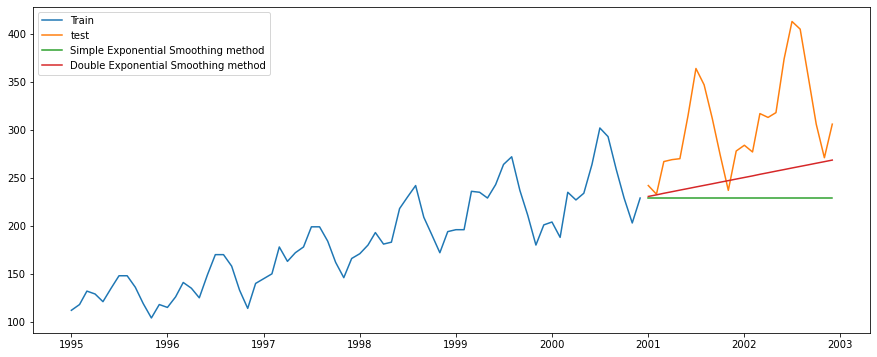

In [283]:
plt.figure(figsize=(15,6))
plt.plot(train_data,label='Train')
plt.plot(test_data,label='test')
plt.plot(test_pred_se,label='Simple Exponential Smoothing method')
plt.plot(test_pred_de,label='Double Exponential Smoothing method')
plt.legend(loc='best')
plt.show()

1. we can observe upword Trend
2. no seasonality observed

### Holt winter exponetial smoothing with additive seasonality and trend( Triple Exponential Method)
Capture Level trend and seasonality

In [284]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Te_model=ExponentialSmoothing(train_data['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit(optimized=True)
test_pred_Te=Te_model.forecast(24)
train_pred_Te=Te_model.fittedvalues
test_rsme_Te=sqrt(mean_squared_error(test_pred_Te,test_data.Passengers))
train_rsme_Te=sqrt(mean_squared_error(train_pred_Te,train_data.Passengers))
mape_Te=MAPE(test_data.Passengers,test_pred_Te)
print('Holt winter exponetial smoothing with additive seasonality and trend','\n',
     'mean absoluet percentage error={}'.format(mape_Te),'\n',\
    'train root mean squared error={}'.format(train_rsme_Te),'\n',
     'test root mean squared error={}'.format(test_rsme_Te))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Holt winter exponetial smoothing with additive seasonality and trend 
 mean absoluet percentage error=9.368354573562144 
 train root mean squared error=6.386634437793857 
 test root mean squared error=34.989365374325125


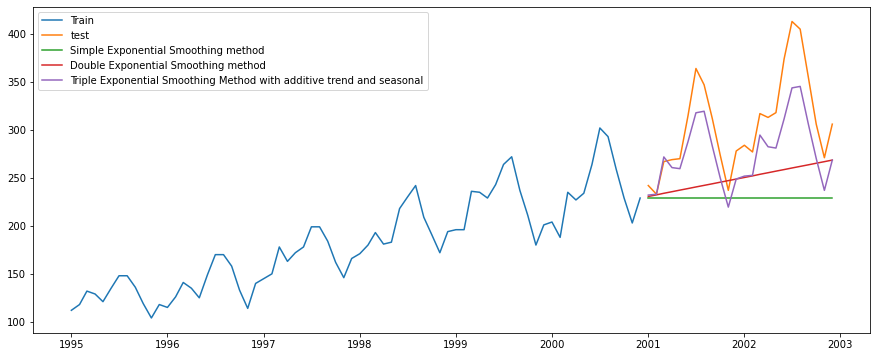

In [285]:
plt.figure(figsize=(15,6))
plt.plot(train_data,label='Train')
plt.plot(test_data,label='test')
plt.plot(test_pred_se,label='Simple Exponential Smoothing method')
plt.plot(test_pred_de,label='Double Exponential Smoothing method')
plt.plot(test_pred_Te,label='Triple Exponential Smoothing Method with additive trend and seasonal')
plt.legend(loc='best')
plt.show()

Error reduced Drastically

### Holt winter exponetial smoothing with additive seasonality and multiplicative trend( Triple Exponential Method)
Capture Level trend and seasonality

In [286]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

MTe_model=ExponentialSmoothing(train_data['Passengers'],seasonal='add',trend='mul',seasonal_periods=12).fit(smoothing_level=0.1,optimized=True)
test_pred_MTe=MTe_model.forecast(24)
train_pred_MTe=MTe_model.fittedvalues
test_rsme_MTe=sqrt(mean_squared_error(test_pred_MTe,test_data.Passengers))
train_rsme_MTe=sqrt(mean_squared_error(train_pred_MTe,train_data.Passengers))
mape_MTe=MAPE(test_data.Passengers,test_pred_MTe)
print('Holt winter exponetial smoothing with additive seasonality and multiplicative trend ','\n',
     'mean absoluet percentage error={}'.format(mape_MTe),'\n',\
    'train root mean squared error={}'.format(train_rsme_MTe),'\n',
     'test root mean squared error={}'.format(test_rsme_MTe))

Holt winter exponetial smoothing with additive seasonality and multiplicative trend  
 mean absoluet percentage error=8.229362909593165 
 train root mean squared error=10.112774534100767 
 test root mean squared error=32.51902436790251


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


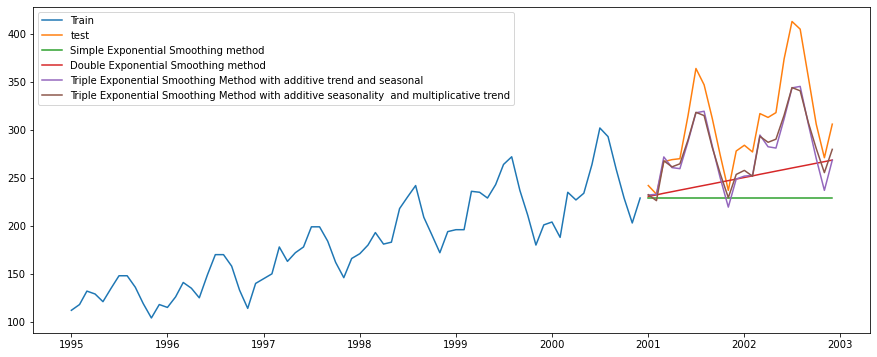

In [287]:
plt.figure(figsize=(15,6))
plt.plot(train_data,label='Train')
plt.plot(test_data,label='test')
plt.plot(test_pred_se,label='Simple Exponential Smoothing method')
plt.plot(test_pred_de,label='Double Exponential Smoothing method')
plt.plot(test_pred_Te,label='Triple Exponential Smoothing Method with additive trend and seasonal')
plt.plot(test_pred_MTe,label='Triple Exponential Smoothing Method with additive seasonality  and multiplicative trend')
plt.legend(loc='best')
plt.show()

### Holt winter exponetial smoothing with multiplicative seasonality and multiplicative trend( Triple Exponential Method)

In [288]:
MMTe_model=ExponentialSmoothing(train_data['Passengers'],seasonal='mul',trend='mul',seasonal_periods=12).fit(optimized=True)
test_pred_MMTe=MMTe_model.forecast(24)
train_pred_MMTe=MMTe_model.fittedvalues
test_rsme_MMTe=sqrt(mean_squared_error(test_pred_MMTe,test_data.Passengers))
train_rsme_MMTe=sqrt(mean_squared_error(train_pred_MMTe,train_data.Passengers))
mape_MMTe=MAPE(test_data.Passengers,test_pred_MMTe)
print('Holt winter exponetial smoothing with multiplicative seasonality and multiplicative trend ','\n',
     'mean absoluet percentage error={}'.format(mape_MMTe),'\n',\
    'train root mean squared error={}'.format(train_rsme_MMTe),'\n',
     'test root mean squared error={}'.format(test_rsme_MMTe))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Holt winter exponetial smoothing with multiplicative seasonality and multiplicative trend  
 mean absoluet percentage error=6.034483884370218 
 train root mean squared error=6.3967514247667365 
 test root mean squared error=23.05679851513917


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


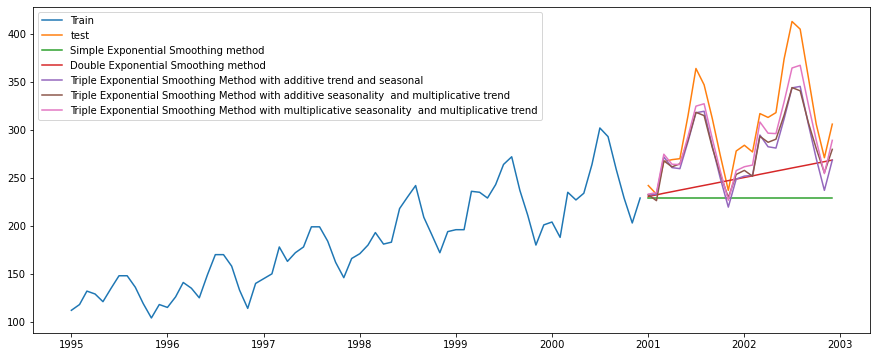

In [289]:
plt.figure(figsize=(15,6))
plt.plot(train_data,label='Train')
plt.plot(test_data,label='test')
plt.plot(test_pred_se,label='Simple Exponential Smoothing method')
plt.plot(test_pred_de,label='Double Exponential Smoothing method')
plt.plot(test_pred_Te,label='Triple Exponential Smoothing Method with additive trend and seasonal')
plt.plot(test_pred_MTe,label='Triple Exponential Smoothing Method with additive seasonality  and multiplicative trend')
plt.plot(test_pred_MMTe,label='Triple Exponential Smoothing Method with multiplicative seasonality  and multiplicative trend')
plt.legend(loc='best')
plt.show()

# Analysing the Result

In [290]:
Evaluation={'model':pd.Series(['Simple_Exp','Double_Exp','Triple_exp_mul_ad','Triple_exp_ad_mul','Triple_exp_Mul_mul']),\
           'Train_RSME':pd.Series([train_rsme_se,train_rsme_de,train_rsme_Te,train_rsme_MTe,train_rsme_MMTe]),\
           'Test_RSME':pd.Series([test_rsme_se,test_rsme_de,test_rsme_Te,test_rsme_MTe,test_rsme_MMTe]),\
           'test MAPE':pd.Series([mape_se,mape_de,mape_Te,mape_MTe,mape_MMTe])}
table=pd.DataFrame(Evaluation).sort_values('test MAPE')
table

,model,Train_RSME,Test_RSME,test MAPE
4,Triple_exp_Mul_mul,6.396751,23.056799,6.034484
3,Triple_exp_ad_mul,10.112775,32.519024,8.229363
2,Triple_exp_mul_ad,6.386634,34.989365,9.368355
1,Double_Exp,18.961290,71.634643,17.148982
0,Simple_Exp,19.031772,91.113254,23.382283


# Visualization of Model Analysis

NameError: name 'table' is not defined

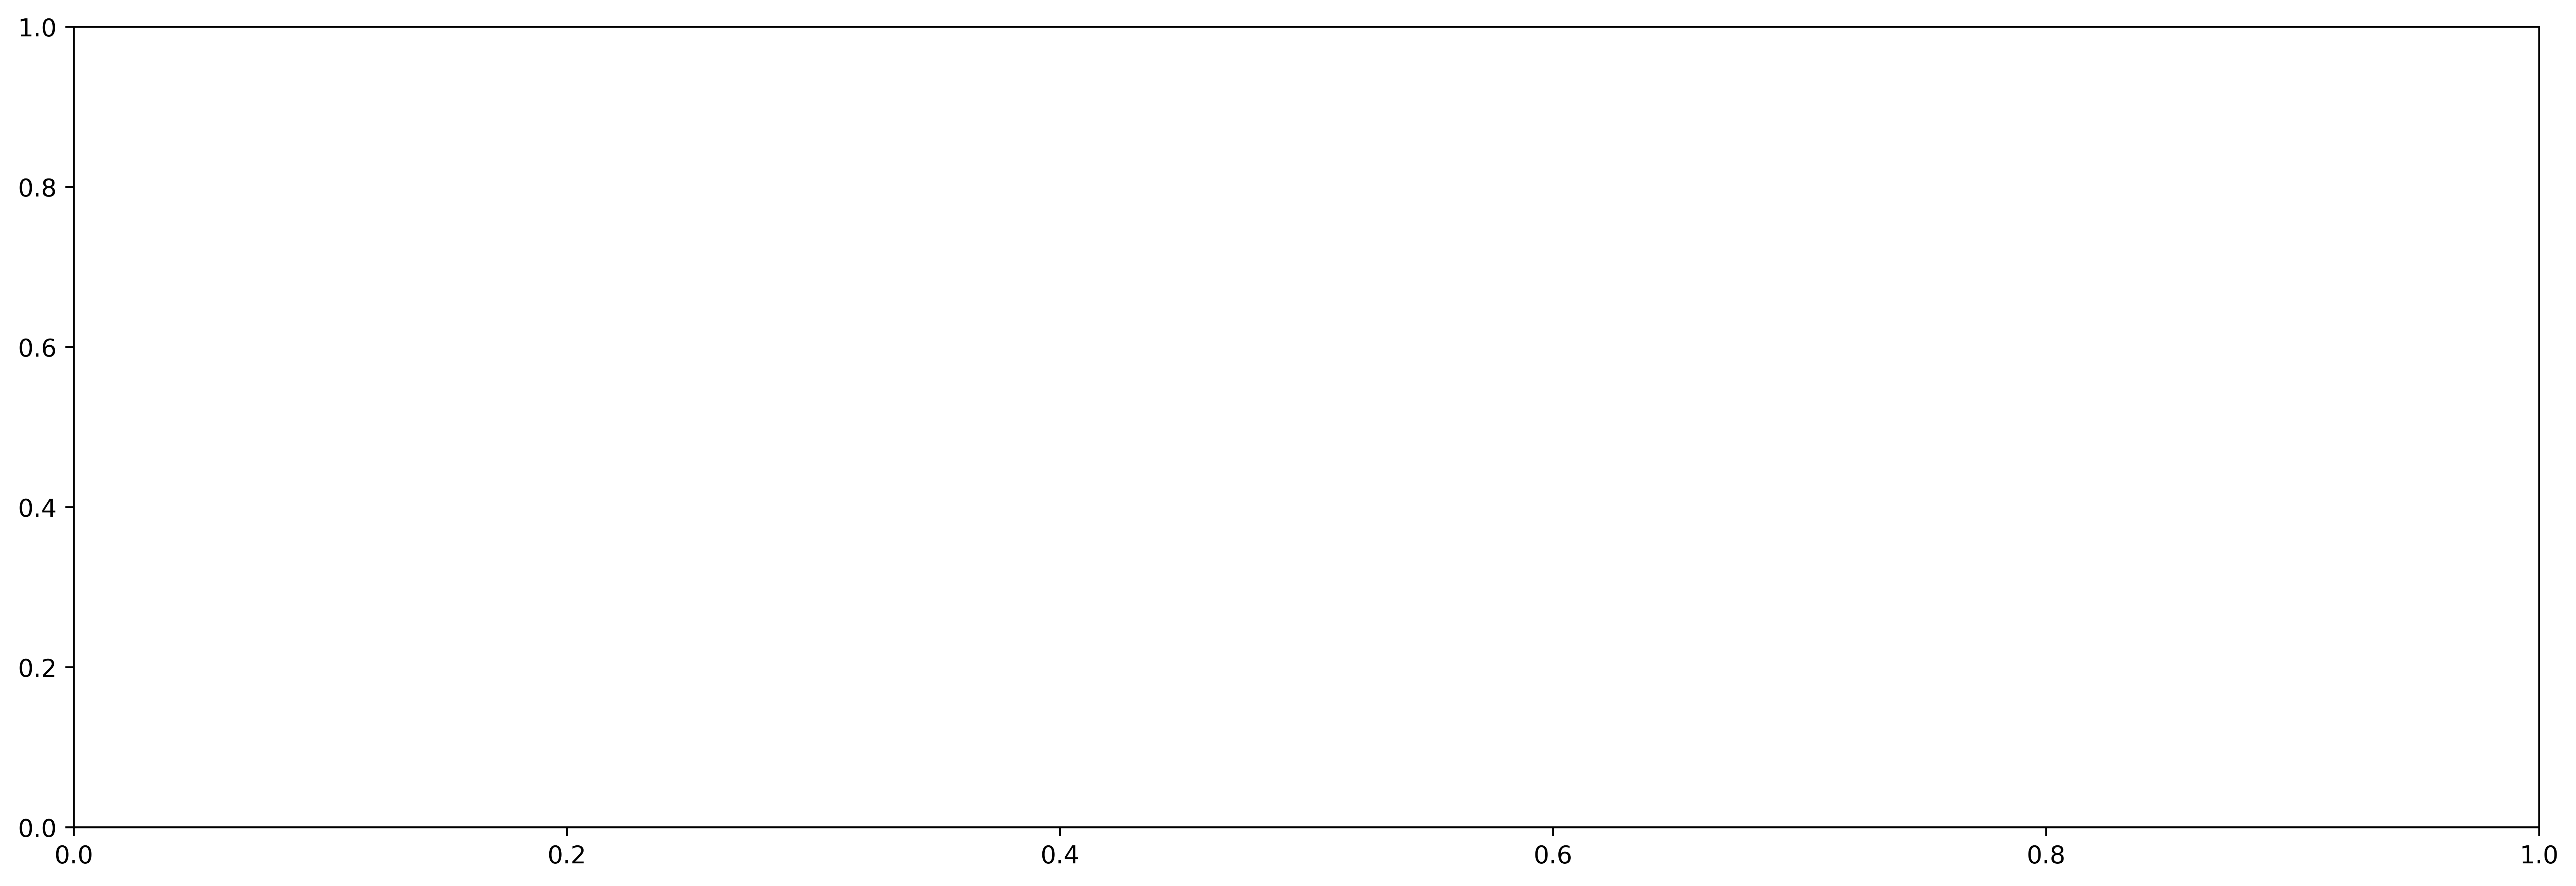

In [3]:
# table['Test_RSME'].plot(kind='bar')
f,ax=plt.subplots(1,1,figsize=(18,6),dpi=500)
sns.barplot(x='Test_RSME',y='model',data=table,ax=ax)

 
for i, v in enumerate(np.round(table.Test_RSME.values,0)):
    ax.text(v+1,i+.20,str(v))
plt.show()

# Time Series Forecasting-II
# testing for stationary
 we use adfuller test to check stationarity of data( dickey fuller test)

Ho= data is not stationary  
H1= data is stationary

In [292]:
from statsmodels.tsa.stattools import adfuller

In [293]:
test_result=adfuller(df['Passengers'])
test_result

(1.3402479596467018,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [294]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels=['ADF test statistic','P-value','lag used','NO of Obs used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print('reject null hypothesis hence data is statinary')
    else:
        print('accept null hypothesis hence data is non statinary')

In [295]:
adfuller_test(df['Passengers'])

ADF test statistic : 1.3402479596467018
P-value : 0.9968250481137263
lag used : 12
NO of Obs used : 83
accept null hypothesis hence data is non statinary


# Making the data Stationary

Since in our data seasonality observe we can do differencing. but since in our data seasonality present we can do shift by 12 month instead of 1, 2 or 3 shift

In [296]:
df['Seasonal_shift']=df['Passengers']-df['Passengers'].shift(12)
df.head(20)

,Date,Passengers,Month,Year,Seasonal_shift
0,1995-01-01,112,Jan,1995,NaN
1,1995-02-01,118,Feb,1995,NaN
2,1995-03-01,132,Mar,1995,NaN
3,1995-04-01,129,Apr,1995,NaN
4,1995-05-01,121,May,1995,NaN
5,1995-06-01,135,Jun,1995,NaN
6,1995-07-01,148,Jul,1995,NaN
7,1995-08-01,148,Aug,1995,NaN
8,1995-09-01,136,Sep,1995,NaN
9,1995-10-01,119,Oct,1995,NaN


<AxesSubplot:>

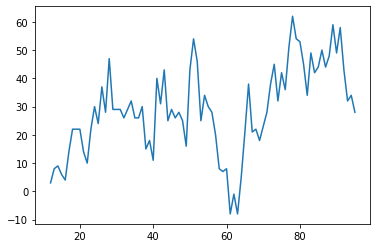

In [297]:
df['Seasonal_shift'].plot()

In [298]:
adfuller_test(df['Seasonal_shift'].dropna())

ADF test statistic : -2.6900043838623167
P-value : 0.07578397625851754
lag used : 1
NO of Obs used : 82
accept null hypothesis hence data is non statinary


# Box Cox Transformation
### Box-Cox transformation makes the variance constant in a series.

In [299]:
from scipy.stats import boxcox

In [300]:
# Creating a new dataset with the boxcox
data_boxcox = pd.Series(boxcox(df['Passengers'], lmbda=0), df.index)
data_boxcox.head()

0    4.718499
1    4.770685
2    4.882802
3    4.859812
4    4.795791
dtype: float64

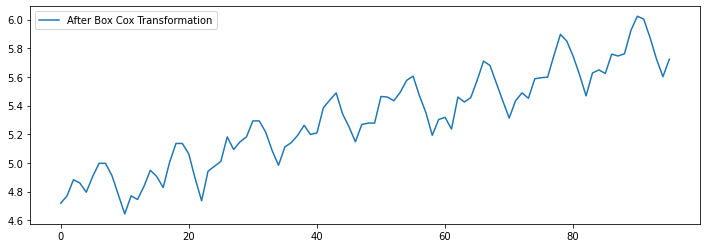

In [301]:

# Plotting the Time series after transformation
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

# Analysis  
1. We can see the variance became almost constant after the transformation. Both in the earlier and later years the variance is almost similar.
2. But we can see that still the series has an upward trend. So, the mean is not constant yet. Hence, we need to do Differencing for making the mean constant.

# Differencing  
Differencing is performed by subtracting the previous observation from the current observation.

Differencing removes trend and seasonality in a Time series. When an entire cycle is used for differencing the other cycle, then the seasonality is removed.

In [302]:
# data_boxcox - data_boxcox.shift() :- Performs difference between the previous and current observations.
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=df.index)

In [303]:

# As the first record becomes null. Hence removing the frist observation.
data_boxcox_diff.dropna(inplace=True)

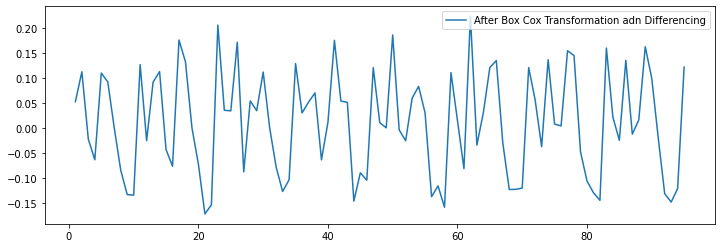

In [304]:

# Plotting the Time series after Box Cox transformation and Differencing
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()


# Analysis
1. We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.
2. It is a horizontal trend.
3. The mean became constant. The mean is zero.
4. Also, the variance is almost constant.  
Lets test the Stationarity again.

# ADF Test

In [305]:
data_boxcox_diff

1     0.052186
2     0.112117
3    -0.022990
4    -0.064022
5     0.109484
        ...   
91   -0.019561
92   -0.131769
93   -0.148533
94   -0.121466
95    0.121466
Length: 95, dtype: float64

In [306]:
adfuller_test(data_boxcox_diff)

ADF test statistic : -2.6708228902694207
P-value : 0.07922469056630133
lag used : 12
NO of Obs used : 82
accept null hypothesis hence data is non statinary


# ARIMA & Seasonal ARIMA model 

## Autoregressive Integrated Moving Average

General process of ARIMA model is following:
1. visualise the time series data
2. make time series data stationary
3. plot the correlation and autocorrelation chart
4. contruct the ARIMA and Seasonal Arima model 
5. use the model to make prediction


AS we hae already visualized the data and make data stationary lets do next process:

# Autocorrelation and Partial Atocorrelation:
1. identification of an AR Model is ofter best done wiht PACF  
2. identification of an MA Model is ofter best done wiht ACF  

p,d,q  
p= AR model lag  
d= differencing  
q= MA lag

# Autocorrelation
# Autocorrelation function (ACF)
## Autocorrelation function captures both direct and indirect relationship with its lagged values.

In [307]:
from statsmodels.graphics.tsaplots import plot_acf

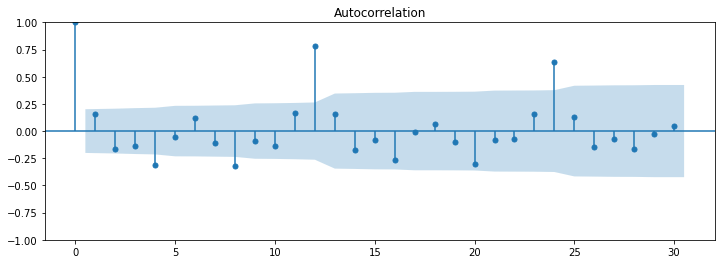

In [308]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()


# Analysis
1. The shaded portion is the less significant.
2. With lag 0, the series is just correlated with itself. Hence, correlation=1 at lag=0.
3. ACF captures both direct and indirect correlation with the lag time.
E.g.:- At lag=5, y(t) is directly correlated with y(t-5).  

Also, y(t) is indirectly correlated with y(t-5) through y(t-4), y(t-3), y(t-2) and y(t-1).

## Partial autocorrelation function (PACF)
Captures only direct correlation.

In [309]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


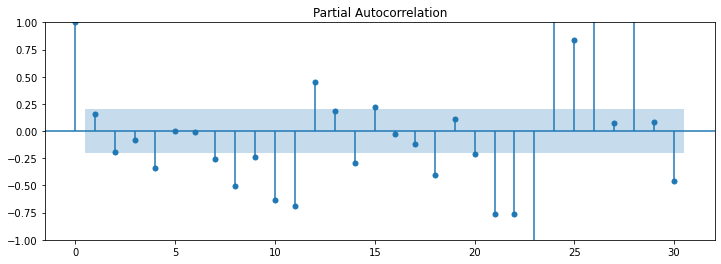

In [310]:
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()


## Analysis
Little change in the correlation plot. Because PACF only captures the direct correlation with the time lag. It bypasses the tile lags in between.

# Building the Regression Model
## Splitting Stationary dataset into train and test set

In [311]:
# Splitting data_boxcox
train_len=72
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

In [312]:
# Splitting data_boxcox_diff

# Taking train_len-1 because we have deleted the forst observation
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

# Simple Auto Regressive Model (AR)

In [313]:

from statsmodels.tsa.arima.model import ARIMA

In [314]:
# p = 1 . We are calculating only one lag time period 
# q = 0 . We have already made the time series as Stationary
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [315]:
model_fit = model.fit()
model_fit.params


const     0.010378
ar.L1     0.124492
sigma2    0.010377
dtype: float64

const      0.009477  
ar.L1.y    0.183116  
dtype: float64  
constant = 0 . Because we saw in the Stationary time series that the mean was almost close to zero.  
  
Coefficient = 0.183  

The AR model has only one lag or p=1. Hence, we can represent the model as *AR(1)* 

## Forecast

In [316]:
y_hat_ar = data_boxcox_diff.copy()

In [317]:
# We are predicting for all the observations train and test set both just to visualise the regression line
# The index column represents the timestamp. So, we are taking all the timestamps from first(index.min) to last(index.max)
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox_diff']


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1     0.015583
2     0.023044
3     0.006224
4     0.001116
5     0.022716
        ...   
91    0.010378
92    0.010378
93    0.010378
94    0.010378
95    0.010378
Name: predicted_mean, Length: 95, dtype: float64

## Recover original time series forecast  
As we have converted the original time series to Stationary series by consecutively applying BoxCox transformation and Differencing. We have to transform the series back to the original one (step by step).

In [318]:
# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

In [319]:
# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])

In [320]:
# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

In [321]:

train_len = 72
train = df[0:train_len]
test = df[train_len:]

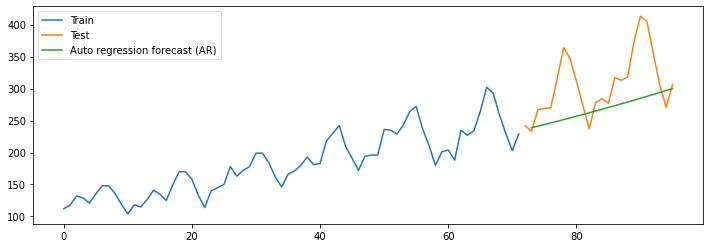

In [322]:

plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

# Analysis
We can see that we have done moderately well.
No Seasonality captured

In [323]:
test['Passengers'].shape

(24,)

In [324]:
 y_hat_ar['ar_forecast'].shape

(95,)

In [325]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][71:]))
rmse

57.89815614218302

In [326]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ar['ar_forecast'][71:])/test['Passengers'])*100),2)
mape


13.08

# Moving Average method (MA)
 The Moving Average Model models the future forecasts using past forecast errors in a regression-like model. This model has a parameter ‘q’ called window size, over which linear combination of errors are calculated.

In [327]:
# q parameter = 1 MA(1) model
# If q = 3 , then it would be MA(3) model
# p = 0 and d = 0 As we are not considering these two parameters in this model.
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [328]:
model_fit = model.fit()
model_fit.params

const     0.010453
ma.L1     0.178296
sigma2    0.010301
dtype: float64

In [329]:

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma

1     0.052186
2     0.112117
3    -0.022990
4    -0.064022
5     0.109484
        ...   
91   -0.019561
92   -0.131769
93   -0.148533
94   -0.121466
95    0.121466
Length: 95, dtype: float64

In [330]:
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [331]:
# Removing Differencing
#y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma

1                                                                   0.052186
2                                                                   0.112117
3                                                                   -0.02299
4                                                                  -0.064022
5                                                                   0.109484
                                                 ...                        
93                                                                 -0.148533
94                                                                 -0.121466
95                                                                  0.121466
ma_forecast_boxcox_diff    1     0.017664
2     0.027277
3     0.001491
4...
ma_forecast_boxcox         1     0.017664
2     0.044941
3     0.046431
4...
Length: 97, dtype: object

In [332]:
# Adding the first Ovservation
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])


In [333]:
# Removing the transformation
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

In [334]:
train_len = 72
train = df[0:train_len]

test = df[train_len:]

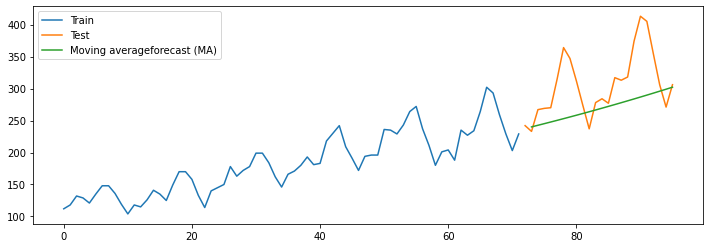

In [335]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving averageforecast (MA)')
plt.legend(loc='best')
plt.show()



In [336]:
rmse_MA = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][71:])).round(2)
rmse_MA

56.76

In [337]:
mape_MA = round(np.mean(np.abs((test['Passengers'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape_MA


13.17

# Analysis
The MA and AR method have almost same results.

# Auto Regressive Moving Average (ARMA)
A time series that exhibits the characteristics of an AR(p) and/or MA(q) process can be modelled using an ARMA(p,q) model.

In [338]:
# p=1 and q=1
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [339]:
model_fit = model.fit()
model_fit.params


const     0.010318
ar.L1    -0.663642
ma.L1     0.840165
sigma2    0.009972
dtype: float64

In [340]:
y_hat_arma = data_boxcox_diff.copy()


In [341]:
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox_diff']

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1     0.015853
2     0.020734
3    -0.003405
4     0.009598
5     0.027424
        ...   
91    0.010324
92    0.010314
93    0.010321
94    0.010316
95    0.010319
Name: predicted_mean, Length: 95, dtype: float64

In [342]:
# Reverse the differencing
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox']

1     0.015853
2     0.036587
3     0.033182
4     0.042780
5     0.070205
        ...   
91    0.936512
92    0.946826
93    0.957147
94    0.967463
95    0.977782
Name: predicted_mean, Length: 95, dtype: float64

In [343]:
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast_boxcox']

1     4.734352
2     4.755086
3     4.751681
4     4.761279
5     4.788704
        ...   
91    5.655011
92    5.665325
93    5.675645
94    5.685962
95    5.696281
Name: predicted_mean, Length: 95, dtype: float64

In [344]:
# Reverse the transformation
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])
y_hat_arma['arma_forecast']

1     113.789702
2     116.173668
3     115.778760
4     116.895362
5     120.145520
         ...    
91    285.719575
92    288.681740
93    291.676539
94    294.701115
95    297.757921
Name: predicted_mean, Length: 95, dtype: float64

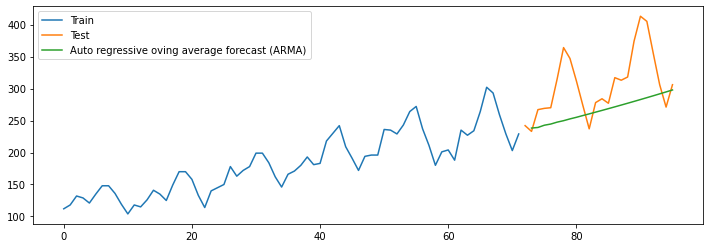

In [345]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto regressive oving average forecast (ARMA)')
plt.legend(loc='best')
plt.show()


In [346]:
rmse_ARMA = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][71:])).round(2)
rmse_ARMA

59.16

In [347]:
mape_ARMA = round(np.mean(np.abs((test['Passengers'] - y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape_ARMA

13.98

# Auto Regressive Integrated Moving Average (ARIMA)
Automatically performs the Differencing if the series has trend.

Hence, no need to manually perform the differencing.

In [348]:
# Passing only the transformed boxcox data. Because ARIMA automatically performing the differencing.
# p = 1
# q = 1
# d = 1   , We are doing only one order differencing.
model = ARIMA(train_data_boxcox_diff, order=(1,1,1))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [349]:
model_fit = model.fit()
model_fit.params


ar.L1     0.140317
ma.L1    -0.997635
sigma2    0.010552
dtype: float64

In [350]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima

1     0.052186
2     0.112117
3    -0.022990
4    -0.064022
5     0.109484
        ...   
91   -0.019561
92   -0.131769
93   -0.148533
94   -0.121466
95    0.121466
Length: 95, dtype: float64

In [351]:
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox_diff']

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1     0.052186
2     0.086356
3     0.034526
4     0.005990
5     0.049767
        ...   
91    0.010402
92    0.010402
93    0.010402
94    0.010402
95    0.010402
Name: predicted_mean, Length: 95, dtype: float64

In [352]:
# Reverse the differencing
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox']

1     0.052186
2     0.138542
3     0.173069
4     0.179059
5     0.228826
        ...   
91    1.281811
92    1.292214
93    1.302616
94    1.313018
95    1.323420
Name: predicted_mean, Length: 95, dtype: float64

In [353]:
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast_boxcox'] 

1     4.770685
2     4.857041
3     4.891567
4     4.897558
5     4.947325
        ...   
91    6.000310
92    6.010712
93    6.021115
94    6.031517
95    6.041919
Name: predicted_mean, Length: 95, dtype: float64

In [354]:
# Reverse the transformation
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])
y_hat_arima['arima_forecast']

1     118.000000
2     128.642979
3     133.162127
4     133.962188
5     140.797773
         ...    
91    403.553955
92    407.773718
93    412.037605
94    416.346077
95    420.699601
Name: predicted_mean, Length: 95, dtype: float64

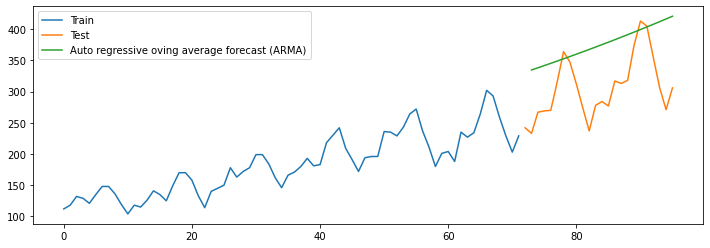

In [355]:
# plt.figure(figsize=(12,4))
# plt.plot(train['Passengers'], label='Train')
# plt.plot(test['Passengers'], label='Test')
# plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA Forecast')
# plt.legend(loc='best')
# plt.show()

plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='Auto regressive oving average forecast (ARMA)')
plt.legend(loc='best')
plt.show()

In [356]:
rmse_ARIMA = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arima['arima_forecast'][71:])).round(2)
rmse_ARIMA

80.27

In [357]:
mape_ARIMA = round(np.mean(np.abs((test['Passengers'] - y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape_ARIMA


24.56

# Seasonal Auto Regressive Integrated Moving Average (SARIMA)
ARIMA with Seasonal component added.

In [358]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [359]:
# We are only passing the Box Cox because the ARIMAX will perform the differencing internally
# seasonal_order P=1, Q=1, D=1 and m=12
# m=12 . Because the seasonality is monthly.
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))

In [360]:
model_fit = model.fit()
model_fit.params


ar.L1       0.194595
ma.L1      -0.585833
ar.S.L12   -0.197910
ma.S.L12   -0.479886
sigma2      0.001819
dtype: float64

In [361]:

# We are copying data_boxcox_diff because we have to compare the test data with the Stationary version of the series (Transformation + Differencing)
y_hat_sarima = data_boxcox_diff.copy()


In [362]:

y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [363]:
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

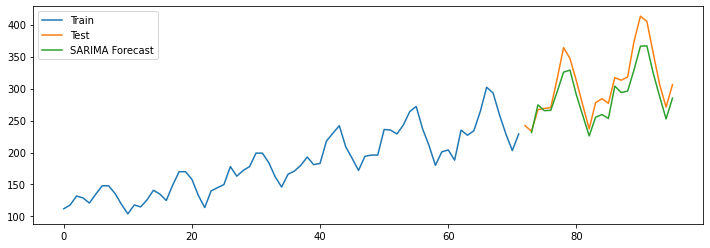

In [364]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()


In [365]:
rmse_SARIMA= np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['sarima_forecast'][71:])).round(2)
rmse_SARIMA

23.93

In [366]:
mape_SARIMA= round(np.mean(np.abs((test['Passengers'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape_SARIMA

6.54

# Seasonal Auto Regressive Integrated Moving Average with External Variables (SARIMAX)

In [367]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))

In [368]:
model_fit = model.fit()
model_fit.params


ar.L1       0.194595
ma.L1      -0.585833
ar.S.L12   -0.197910
ma.S.L12   -0.479886
sigma2      0.001819
dtype: float64

In [369]:

y_hat_sarimax = data_boxcox_diff.copy()

In [370]:
# Predicting only for test data. Not the entire series.
# Passing the exogenous test data
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(test.index.min(), test.index.max() )

In [371]:

# Reversing the transformation
# Note:- Reversing the differencing is automatically taken care by SARIMAX
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])
y_hat_sarimax['sarimax_forecast']

72    233.203499
73    231.141871
74    274.458793
75    265.416737
76    265.948634
77    294.854076
78    325.650824
79    328.744825
80    289.997160
81    257.760746
82    225.917777
83    255.102781
84    259.295453
85    253.266792
86    303.789239
87    293.712233
88    295.957327
89    329.259431
90    366.187024
91    366.772287
92    323.674825
93    287.395043
94    252.457333
95    285.015578
Name: predicted_mean, dtype: float64

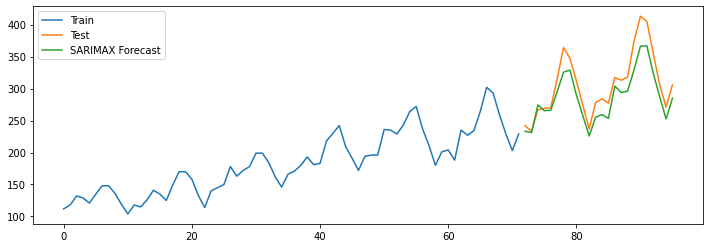

In [372]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'], label='SARIMAX Forecast')
plt.legend(loc='best')
plt.show()

In [373]:
rmse_SARIMAX = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarimax['sarimax_forecast'])).round(2)
rmse_SARIMAX

23.93

In [374]:
mape_SARIMAX= round(np.mean(np.abs((test['Passengers'] - y_hat_sarimax['sarimax_forecast'])/test['Passengers'])*100),2)
mape_SARIMAX


6.42

In [375]:
Evaluation={'model':pd.Series(['Simple_Exp','Double_Exp','Triple_exp_mul_ad','Triple_exp_ad_mul','Triple_exp_Mul_mul',\
                               'MA',"Arma","Arima",'SARIMA','SARIMAX']),\
           'Train_RSME':pd.Series([train_rsme_se,train_rsme_de,train_rsme_Te,train_rsme_MTe,train_rsme_MMTe,\
                                  ]),\
           'Test_RSME':pd.Series([test_rsme_se,test_rsme_de,test_rsme_Te,test_rsme_MTe,test_rsme_MMTe,  rmse_MA,rmse_ARMA,rmse_ARIMA,rmse_SARIMA,rmse_SARIMAX]),\
           'test MAPE':pd.Series([mape_se,mape_de,mape_Te,mape_MTe,mape_MMTe,mape_MA,mape_ARMA,mape_ARIMA,mape_SARIMA,mape_SARIMAX])}
table=pd.DataFrame(Evaluation).sort_values('test MAPE')
table

,model,Train_RSME,Test_RSME,test MAPE
4,Triple_exp_Mul_mul,6.396751,23.056799,6.034484
9,SARIMAX,NaN,23.930000,6.420000
8,SARIMA,NaN,23.930000,6.540000
3,Triple_exp_ad_mul,10.112775,32.519024,8.229363
2,Triple_exp_mul_ad,6.386634,34.989365,9.368355
5,MA,NaN,56.760000,13.170000
6,Arma,NaN,59.160000,13.980000
1,Double_Exp,18.961290,71.634643,17.148982
0,Simple_Exp,19.031772,91.113254,23.382283
7,Arima,NaN,80.270000,24.560000
